In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index
from PointProcess import PointProcessTrain
from PointProcess import PointProcessRun
from wasserstein import Cluster
from numpy import array

In [2]:
fields = ['XCOORD', 'YCOORD', 'CALL_TYPE_FINAL_D', 'CALL_TYPE_FINAL', 'DATE_TIME']
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv', usecols=fields)
full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')
save_loc_out = 'Trained_Params_70_50_day4.npz'

Counter({3: 131304,
         4: 134757,
         5: 133326,
         6: 127225,
         0: 131584,
         1: 132744,
         2: 131599})

In [32]:
end = len(full_data)- 40000
start = end-800000
data = full_data[start:end]
data.reset_index(drop=True, inplace=True)
#reasonable results
all_events = PointProcessTrain(data, w = [.14, 1, .03],final_param_save_loc = save_loc_out, xgridsize = 70, ygridsize = 50) 
#all_events = PointProcessTrain(data, w = [24, 4, 1],final_param_save_loc = save_loc_out, xgridsize = 70, ygridsize = 50, lam_memory=1000) 



In [ ]:
all_events.train()

0.125 percent trained
0.25 percent trained
0.375 percent trained
0.5 percent trained
0.625 percent trained
0.75 percent trained
0.8750000000000001 percent trained
1.0 percent trained
1.125 percent trained
1.25 percent trained
1.375 percent trained
1.5 percent trained
1.625 percent trained
1.7500000000000002 percent trained
1.875 percent trained
2.0 percent trained
2.125 percent trained
2.25 percent trained
2.375 percent trained
2.5 percent trained
2.625 percent trained
2.75 percent trained
2.875 percent trained
3.0 percent trained
3.125 percent trained
3.25 percent trained
3.375 percent trained
3.5000000000000004 percent trained
3.6249999999999996 percent trained
3.75 percent trained
3.875 percent trained
4.0 percent trained
4.125 percent trained
4.25 percent trained
4.375 percent trained
4.5 percent trained
4.625 percent trained
4.75 percent trained
4.875 percent trained
5.0 percent trained
5.125 percent trained
5.25 percent trained
5.375 percent trained
5.5 percent trained
5.625 perc

44.125 percent trained
44.25 percent trained
44.375 percent trained
44.5 percent trained
44.625 percent trained
44.75 percent trained
44.875 percent trained
45.0 percent trained
45.125 percent trained


In [ ]:
all_events.param_examine()

In [ ]:
all_events.model_hotspot_examine(20)

#### Testing Projections w/Simulation

In [ ]:
simulation = PointProcessRun(param_location = save_loc_out, save_loc = 'PPtesting.npz')
start_index = end
end_index = start_index + 150
test_points = full_data[start_index:end_index]
test_points.reset_index(drop=True,inplace=True)
print(simulation._LastTime, test_points.DATE_TIME[0])
ints,ig,pred,ig,ig,ig,ig,=simulation.test_projection(test_points, num_hotspots = 30)

In [ ]:
simulation = PointProcessRun(param_location = save_loc_out, save_loc = 'PPtesting.npz')

ints,ig,pred,ig,ig,ig,ig,=simulation.test_projection(test_points, num_hotspots = 30, use_synthetic=False)

#### Lets get results

In [ ]:
save_loc = save_loc_out

In [ ]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')
last_t = simulation._LastTime
max_iters = 10

indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*1: # 4 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_1h = []
real_num_1h = []
pai_1h = []

if len(indices)<max_iters:
    max_iters = len(indices)

for i in range(0, max_iters):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0, use_synthetic=False)
    pred_num_1h.append(sum(sum(pred)))
    real_num_1h.append(sum(sum(real)))
    pai_1h.append(pai)
    #simulation.update_from_new_inputs(test_points)
  

simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')

pred_num_1h_sim = []
real_num_1h_sim = []
pai_1h_sim = []

for i in range(0, max_iters):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_1h_sim.append(sum(sum(pred)))
    real_num_1h_sim.append(sum(sum(real)))
    pai_1h_sim.append(pai)
    #simulation.update_from_new_inputs(test_points)

In [ ]:
plt.plot(pred_num_1h)
plt.plot(pred_num_1h_sim)

In [ ]:
#print(pred_num_4h, real_num_4h, pai_4h)
print(np.mean(pred_num_1h), np.mean(real_num_1h), np.mean(pai_1h), 
      np.median(pred_num_1h), np.median(real_num_1h), np.median(pai_1h))

print(np.mean(pred_num_1h_sim), np.mean(real_num_1h_sim), np.mean(pai_1h_sim), 
      np.median(pred_num_1h_sim), np.median(real_num_1h_sim), np.median(pai_1h_sim))

In [ ]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')
last_t = simulation._LastTime
max_iters = 10

indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*2: # 4 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_2h = []
real_num_2h = []
pai_2h = []

if len(indices)<max_iters:
    max_iters = len(indices)

for i in range(0, max_iters):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0, use_synthetic=False)
    pred_num_2h.append(sum(sum(pred)))
    real_num_2h.append(sum(sum(real)))
    pai_2h.append(pai)
    #simulation.update_from_new_inputs(test_points)
  

simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')

pred_num_2h_sim = []
real_num_2h_sim = []
pai_2h_sim = []

for i in range(0, max_iters):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_2h_sim.append(sum(sum(pred)))
    real_num_2h_sim.append(sum(sum(real)))
    pai_2h_sim.append(pai)
    #simulation.update_from_new_inputs(test_points)

In [ ]:
plt.plot(pred_num_2h)
plt.plot(pred_num_2h_sim)

In [ ]:
#print(pred_num_4h, real_num_4h, pai_4h)
print(np.mean(pred_num_2h), np.mean(real_num_2h), np.mean(pai_2h), 
      np.median(pred_num_2h), np.median(real_num_2h), np.median(pai_2h))

print(np.mean(pred_num_2h_sim), np.mean(real_num_2h_sim), np.mean(pai_2h_sim), 
      np.median(pred_num_2h_sim), np.median(real_num_2h_sim), np.median(pai_2h_sim))

In [ ]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')
last_t = simulation._LastTime
max_iters = 10

indices = []
for i in range(end, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*4: # 4 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_4h = []
real_num_4h = []
pai_4h = []

if len(indices)<max_iters:
    max_iters = len(indices)

for i in range(0, max_iters):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0, use_synthetic=False)
    pred_num_4h.append(sum(sum(pred)))
    real_num_4h.append(sum(sum(real)))
    pai_4h.append(pai)
    #simulation.update_from_new_inputs(test_points)
  

simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')

pred_num_4h_sim = []
real_num_4h_sim = []
pai_4h_sim = []

for i in range(0, max_iters):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0)
    pred_num_4h_sim.append(sum(sum(pred)))
    real_num_4h_sim.append(sum(sum(real)))
    pai_4h_sim.append(pai)
    #simulation.update_from_new_inputs(test_points)

In [ ]:
plt.plot(pred_num_4h)
plt.plot(pred_num_4h_sim)

In [ ]:
#print(pred_num_4h, real_num_4h, pai_4h)
print(np.mean(pred_num_4h), np.mean(real_num_4h), np.mean(pai_4h), 
      np.median(pred_num_4h), np.median(real_num_4h), np.median(pai_4h))

print(np.mean(pred_num_4h_sim), np.mean(real_num_4h_sim), np.mean(pai_4h_sim), 
      np.median(pred_num_4h_sim), np.median(real_num_4h_sim), np.median(pai_4h_sim))

In [ ]:
plt.rcParams.update({'font.size': 40, 'text.color' : "black",
                     'axes.labelcolor' : "black"})

import sklearn.metrics
rmse1 = sqrt(sklearn.metrics.mean_squared_error(real_num_1h, pred_num_1h))/ (np.mean(real_num_1h))
rmse2 = sqrt(sklearn.metrics.mean_squared_error(real_num_2h, pred_num_2h))/(np.mean(real_num_2h))
rmse4 = sqrt(sklearn.metrics.mean_squared_error(real_num_4h, pred_num_4h))/(np.mean(real_num_4h))

rmse1_sim = sqrt(sklearn.metrics.mean_squared_error(real_num_1h_sim, pred_num_1h_sim))/ (np.mean(real_num_1h_sim))
rmse2_sim = sqrt(sklearn.metrics.mean_squared_error(real_num_2h_sim, pred_num_2h_sim))/ (np.mean(real_num_2h_sim))
rmse4_sim = sqrt(sklearn.metrics.mean_squared_error(real_num_4h_sim, pred_num_4h_sim))/ (np.mean(real_num_4h_sim))

mae1 = sklearn.metrics.mean_absolute_error(real_num_1h, pred_num_1h)
mae2 = sklearn.metrics.mean_absolute_error(real_num_2h, pred_num_2h)
mae4 = sklearn.metrics.mean_absolute_error(real_num_4h, pred_num_4h)

mae1_sim = sklearn.metrics.mean_absolute_error(real_num_1h_sim, pred_num_1h_sim)
mae2_sim = sklearn.metrics.mean_absolute_error(real_num_2h_sim, pred_num_2h_sim)
mae4_sim = sklearn.metrics.mean_absolute_error(real_num_4h_sim, pred_num_4h_sim)

plt.figure(figsize=(50,50))
plt.plot(real_num_1h, pred_num_1h, 'r.', label = "1Hr. NRMSE="+str(round(rmse1, 2))+". MAE="+str(round(mae1, 2)), markersize=38)
plt.plot(real_num_2h, pred_num_2h, 'g.', label = "2Hr. NRMSE="+str(round(rmse2, 2))+". MAE="+str(round(mae2, 2)), markersize=38)
plt.plot(real_num_4h, pred_num_4h, 'b.', label = "4Hr. NRMSE="+str(round(rmse4, 2))+". MAE="+str(round(mae4, 2)), markersize=38)
plt.plot(real_num_1h, pred_num_1h_sim, 'r.', label = "1Hr w/sim. NRMSE="+str(round(rmse1_sim, 2))+". MAE w/sim="+str(round(mae1_sim, 2)), markersize=38, marker='*')
plt.plot(real_num_2h, pred_num_2h_sim, 'g.', label = "2Hr w/sim. NRMSE="+str(round(rmse2_sim, 2))+". MAE w/sim="+str(round(mae2_sim, 2)), markersize=38, marker='*')
plt.plot(real_num_4h, pred_num_4h_sim, 'b.', label = "4Hr w/sim. NRMSE="+str(round(rmse4_sim, 2))+". MAE w/sim="+str(round(mae4_sim, 2)), markersize=38, marker='*')
plt.xlabel('Real Number of Events')
plt.ylabel('Predicted Number of Events')
plt.legend()
plt.title('Number of Events for 10 periods of 1, 2, and 4 hours')
x = np.arange(1, 70)
plt.plot(x, x)

In [ ]:

labels=['1Hr',
        '1Hr w/sim',
        '2Hr', 
        '2Hr w/sim',
        '4Hr',
        '4Hr w/sim']

x_pos = np.arange(len(labels))
CTEs = [np.mean(pai_1h),
        np.mean(pai_1h_sim),
        np.mean(pai_2h), 
        np.mean(pai_2h_sim),
        np.mean(pai_4h),
        np.mean(pai_4h_sim)]

error = [np.std(pai_1h),
         np.std(pai_1h_sim),
         np.std(pai_2h),
         np.std(pai_2h_sim),
         np.std(pai_4h), 
         np.std(pai_4h_sim)]

fig, ax = plt.subplots(figsize=(24,15))

ax.bar(x_pos, CTEs, yerr = error,color=[11/255,122/255,117/255], alpha=0.5, ecolor='black', capsize=5,error_kw=dict(lw=5, capsize=5, capthick=3))
ax.set_ylabel("PAI")
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
#ax.set_title("Average PAI for 20 predicions over 1, 2, and 4 hours \nfor 50 by 50 grid (cell size of .16 mi^2)")
ax.yaxis.grid(True)

plt.show()

#### What about peak time detection?

In [ ]:
percentile = 80

In [ ]:
simulation = PointProcessRun(param_location = save_loc_out, save_loc = 'PPtesting.npz')
simulation._LastTime

max_iters = 70

last_t = simulation._LastTime
indices = []
for i in range(end+10000, len(full_data)-1):
    if (full_data.DATE_TIME[i] - last_t).total_seconds() > 3600*2: # 2 hours in seconds
        last_t = full_data.DATE_TIME[i]
        indices.append(i)
        
pred_num_2h = []
real_num_2h = []
pai_2h = []
percentile_2h = []

if len(indices)-2 < max_iters:
    max_iters=len(indices)

for i in range(0, max_iters):
    test_points = full_data[indices[i]:indices[i+1]]
    test_points.reset_index(drop=True, inplace=True)
    ig, ig, pred, ig, real, ig, pai = simulation.test_projection(test_points, num_hotspots=30, top_percent=0, use_synthetic=True)
    pred_num_2h.append(sum(sum(pred)))
    real_num_2h.append(sum(sum(real)))
    pai_2h.append(pai)
    percentile_2h.append(np.percentile(array(pred_num_2h), percentile))
    test_points.to_csv('for_results.csv')
    #simulation.update_from_new_inputs(test_points)

In [ ]:
plt.rcParams.update({'font.size': 10, 'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.figure(figsize=(10,5))
plt.plot(pred_num_2h, 'b.-', label="Predicted")
plt.plot(real_num_2h, 'r.-', label="Real")
plt.legend()
plt.xlabel("2 hour increments from " + str(full_data.DATE_TIME[indices[0]])+ " to " +str(full_data.DATE_TIME[indices[max_iters]]))
plt.ylabel("Number of events")
plt.show()

In [ ]:
pred_num_2h = array(pred_num_2h)
real_num_2h = array(real_num_2h)
percentile_2h = array(percentile_2h)
np.mean(percentile_2h), np.percentile(pred_num_2h, percentile), np.percentile(real_num_2h, percentile)

In [ ]:
import sklearn.metrics
rmse2 = sqrt(sklearn.metrics.mean_squared_error(real_num_2h, pred_num_2h))/(np.mean(real_num_2h))

mae2 = sklearn.metrics.mean_absolute_error(real_num_2h, pred_num_2h)

plt.rcParams.update({'font.size': 150, 'text.color' : "black",
                     'axes.labelcolor' : "black"})


fig = plt.figure(figsize=(75,75))
ax = plt.subplot()
x = np.arange(5, 55)
ax.plot(x, x, color=[11/255,122/255,117/255], linewidth=17.0)
ax.plot(real_num_2h, pred_num_2h, color = [153/255,1/255,0], marker=".",linestyle="", label = "2Hr. NRMSE="+str(round(rmse2, 2))+". MAE="+str(round(mae2, 2)), markersize=58)
plt.xlabel('Real Number of Events')
plt.ylabel('Predicted Number of Events')
plt.legend()


In [ ]:
st_indx =0
pred = pred_num_2h[st_indx:] - percentile_2h[st_indx:]
neg_indx = pred < 0
pred[neg_indx] = 0
pos_indx = pred > 0
pred[pos_indx] = 1


real = real_num_2h[st_indx:] - np.percentile(real_num_2h, percentile)
neg_indx = real < 0
real[neg_indx] = 0
pos_indx = real > 0
real[pos_indx] = 1


sklearn.metrics.roc_auc_score(pred, real)

In [ ]:
num_events_in_top_percentile = 0
false_neg = 0
true_neg = 0
false_pos = 0
true_pos = 0

for i in range(0, len(real)):
    if real[i]:
        num_events_in_top_percentile += 1
    if real[i] and pred[i]:
        true_pos += 1
    elif real[i] and not pred[i]:
        false_neg += 1
    elif not real[i] and not pred[i]:
        true_neg +=1
    elif not real[i] and pred[i]:
        false_pos +=1
print("\nTot num top percentile events: ")
print(num_events_in_top_percentile)
print('\nTrue pos: ')
print(true_pos)
print("\nFalse neg: ")
print(false_neg)
print("\nFalse pos: ")
print(false_pos)
print("\nTrue neg: ")
print(true_neg)

### Checking Wasserstein

In [ ]:
simulation = PointProcessRun(param_location = save_loc, save_loc = 'PPtesting.npz')
start_time = simulation._LastTime
num = 300
future_intensity, times, incr = simulation.get_future_events(start_time, num, 0)
future_intensity = sum(future_intensity)
wasserstein_locs = simulation.locs_for_wasserstein(start_time, num, top_percent=96)


In [29]:
wasserstein_locs

array([[ 3.98236184e+01, -8.62842609e+01,  2.43714041e+00],
       [ 3.98358633e+01, -8.62779696e+01,  1.21861855e-05],
       [ 3.98236184e+01, -8.62716783e+01,  2.10194877e-02],
       [ 3.98481082e+01, -8.62653870e+01,  3.50979920e-01],
       [ 3.97991286e+01, -8.62590957e+01,  3.90504145e-01],
       [ 3.98113735e+01, -8.62590957e+01,  1.29205120e-01],
       [ 3.98236184e+01, -8.62590957e+01,  6.52034868e-01],
       [ 3.98113735e+01, -8.62465130e+01,  1.60700537e-01],
       [ 3.97807612e+01, -8.62213478e+01,  4.02171881e-01],
       [ 3.97991286e+01, -8.62213478e+01,  7.43604498e-04],
       [ 3.97807612e+01, -8.62150565e+01,  1.78211992e-01],
       [ 3.97623939e+01, -8.62087652e+01,  4.90962110e-01],
       [ 3.97746388e+01, -8.62087652e+01,  9.11112277e-01],
       [ 3.97807612e+01, -8.62087652e+01,  4.78039203e-01],
       [ 3.97501490e+01, -8.62024739e+01,  3.58296940e-01],
       [ 3.98787204e+01, -8.62024739e+01,  1.16663022e-01],
       [ 3.97501490e+01, -8.61961826e+01

In [30]:
cluster = Cluster(wasserstein_locs, n = 6)
cluster.randomize_centers()
lam = cluster.learn_lam(n_iter=8, rand_centers=False)
centers= cluster.get_centers()
centers_grid_x = np.zeros(len(centers))
centers_grid_y = np.zeros(len(centers))

for i in range(0, len(centers)):
    x, y = simulation.coord_to_grid(centers[i][1], centers[i][0])
    centers_grid_x[i] = x
    centers_grid_y[i] = y
centers_grid_x, centers_grid_y

[2.6106434027989853, 35.0]
[2.283455541737266, 55.0]
[2.104171659558671, 74.0]
[1.9397402642360724, 92.0]
[1.8756909822334298, 109.0]
[1.8535861426518994, 125.0]
[1.8480983734698002, 140.0]
[1.8408814546779666, 154.0]
Iteration:  8


(array([47., 36., 28., 21., 25., 28.]), array([27., 23., 16., 29., 23., 24.]))

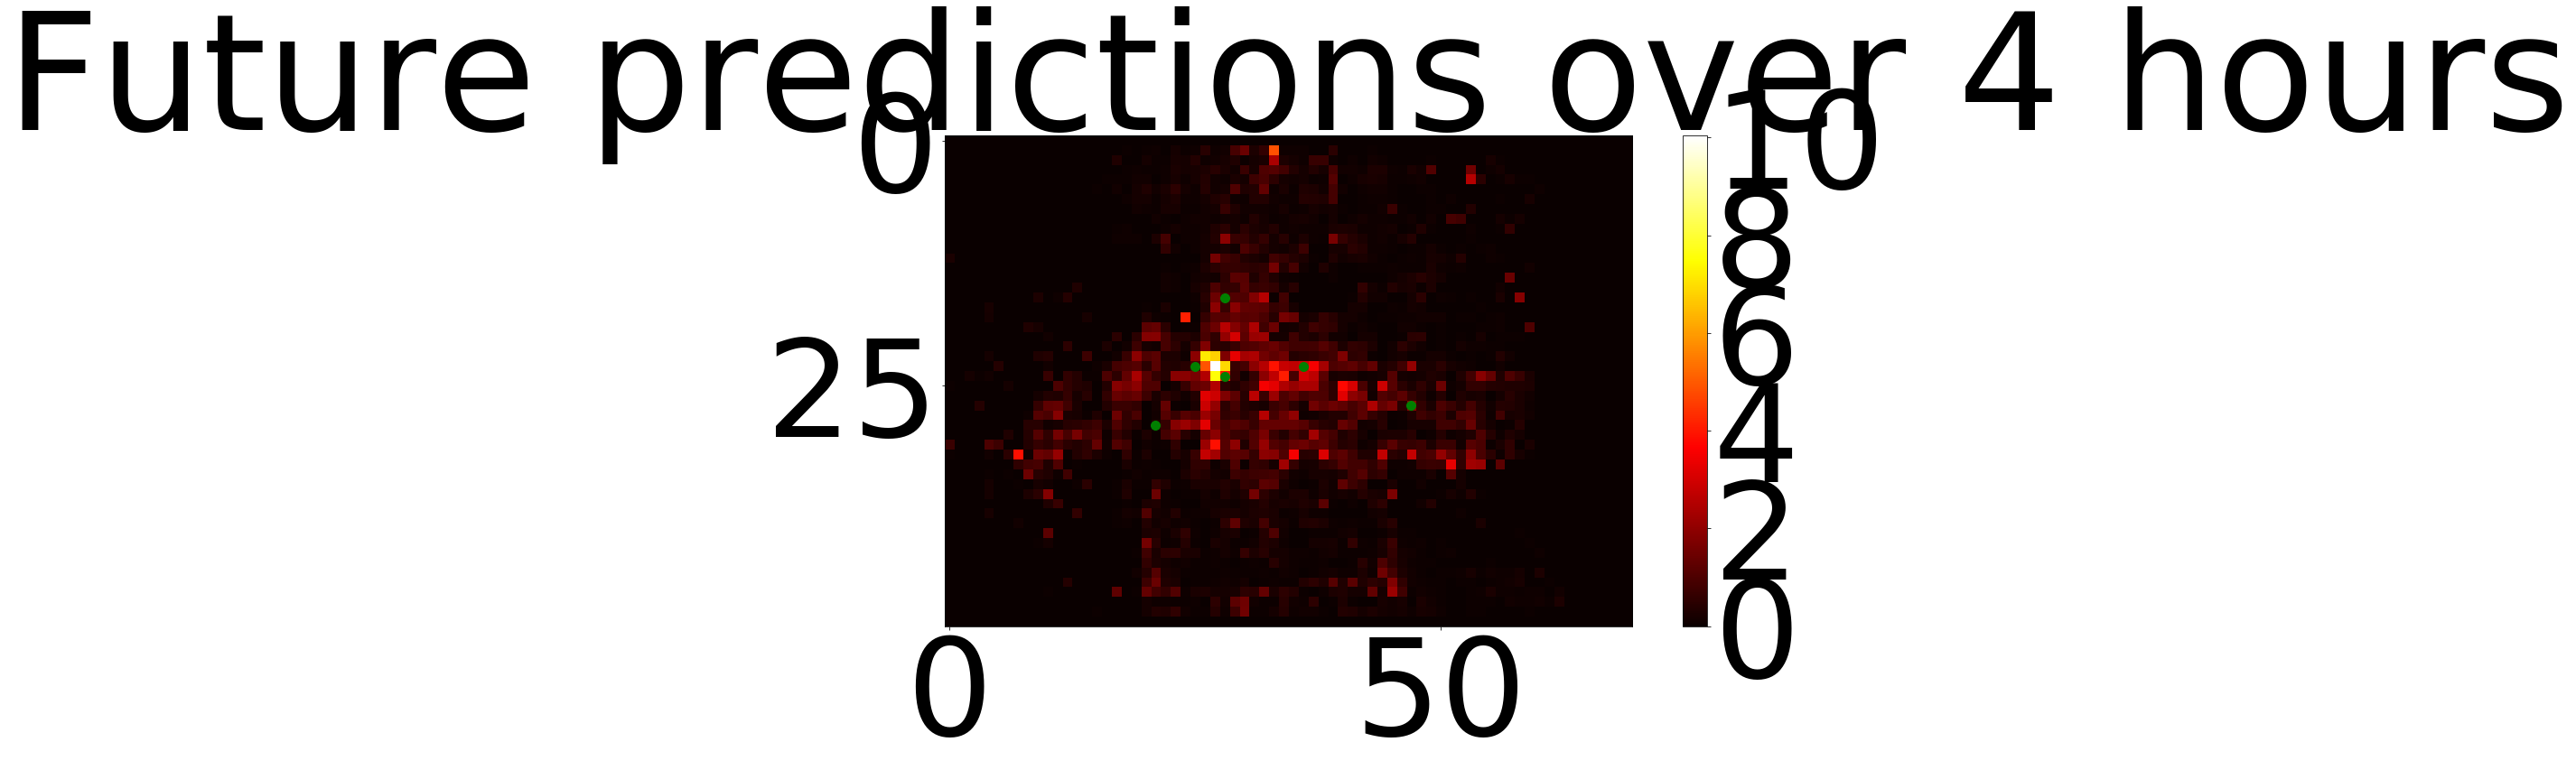

In [31]:
plt.figure(figsize=(20,10))
plt.imshow(np.transpose(future_intensity),cmap='hot', interpolation = 'nearest')
plt.title('Future predictions over 4 hours')
plt.plot(centers_grid_x, centers_grid_y, 'g.', markersize = 20)
plt.colorbar()
plt.show()